### Visualización, inicialización y entedimiento de los datos

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression

In [2]:
# Carreguem el dataset
dataset = pd.read_csv('AB_NYC_2019.csv', header=0, delimiter=',')
data = dataset.values

print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (48895, 16)


In [3]:
print("Para entender que tipos de datos estamos tratando:")
dataset.dtypes

Para entender que tipos de datos estamos tratando:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
print("Para conocer la estructura de datos un poco:")
dataset.head(3)

Para conocer la estructura de datos un poco:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


Comprobamos de validez de los datos

 ### Depurado, limpieza de datos e interpretación de datos

In [5]:
print("Empezamos observando los valores inapropiados en la BD:")
print(dataset.isnull().sum())

Empezamos observando los valores inapropiados en la BD:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
print("Observamos las estadísticas de los parámetros existentes para detectar posibles outliers:")
dataset.describe()

Observamos las estadísticas de los parámetros existentes para detectar posibles outliers:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


De primeras podemos observar que de los datos que presentan nulos tanto name como host_id no nos aportan excesiva información, por otro lado de los datos observados podemos ver que el campo last-review corresponde a la fecha donde se efectuó y reviews_per_month es un conteo, cosa que aparentemente queda como nulo si no tiene ninguno, por ello eliminaremos el campo last-review y rellenaremos los nulls de reviews_per_month con 0.0s debido a que podemos asumir que no han presentado reviews,
por otro lado y para limpiar los datos podemos eliminar id ya que es un campo identificativo incremental de la base de datos.

In [7]:
dataset.drop(['id','host_name','last_review'], axis=1, inplace=True)
dataset.fillna({'reviews_per_month':0}, inplace=True)
dataset.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Antes de seguir con los siguientes análisis convertiremos neighbourhood, neighbourhood_groups y room_types a parámetros numericos para poder entender su correlación y simplificar el análisis

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

dataset['neighbourhood_group'] = le.fit_transform(dataset['neighbourhood_group'])
dataset['room_type'] = le.fit_transform(dataset['room_type'])
dataset['neighbourhood'] = le.fit_transform(dataset['neighbourhood'])

Podemos tomar este cuadro para analizar la correlación entre los diferentes datos de cara a establecer un posterior modelo de predicción, y podemos ver que dentro de lo mostrado hay una fuerte correlación entre el precio y lo que parece ser la longitud llevandonos a pensar que la posición geográfica del sitio influye en el precio de reserva de la parcela.

También vemos que en base a la disponibilidad parece ser que varia el número de reservas, factor que se ve comprensible y lógico y bueno sería descarado obviar la correlación entre las reviews por mes y el número de reviews que como ya indicamos anteriormente es casi inversamente proporcional partiendo de que uno de los datos origina el otro.

C:\Users\Kaz\AppData\Local\Temp\ipykernel_8188\784411634.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr(method='pearson')


<IPython.core.display.Javascript object>


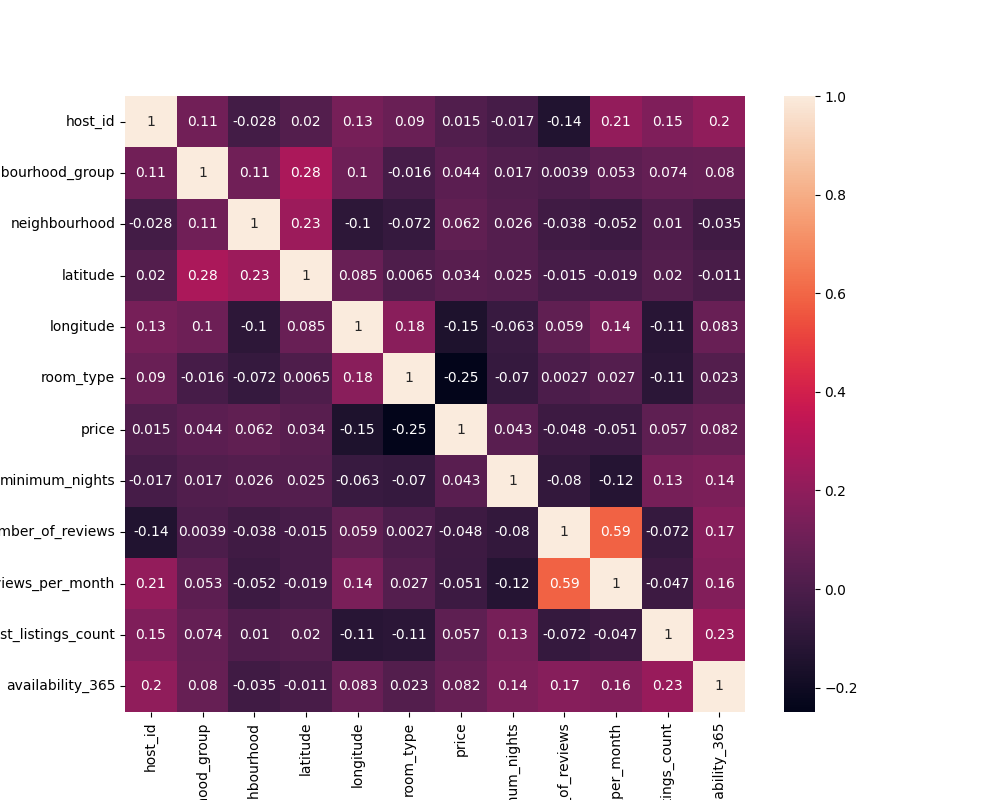

<AxesSubplot: >

In [342]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

Podemos ver que el precio viene fuertemente anclado al tipo de habitación pero que al mismo tiempo tiene una relevante correlación con la longitud y una mínima con el vecindario lo que nos quiere indicar que de algún modo la geografía parece afectar a este dato

In [9]:
dataset['neighbourhood_group'].value_counts()

2    21661
1    20104
3     5666
0     1091
4      373
Name: neighbourhood_group, dtype: int64

<IPython.core.display.Javascript object>


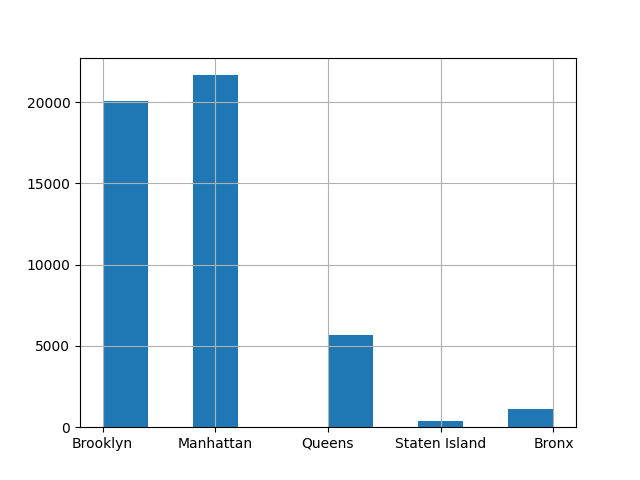

<AxesSubplot: >

In [146]:
hist_mn2=dataset["neighbourhood_group"].hist()
hist_mn2

<IPython.core.display.Javascript object>


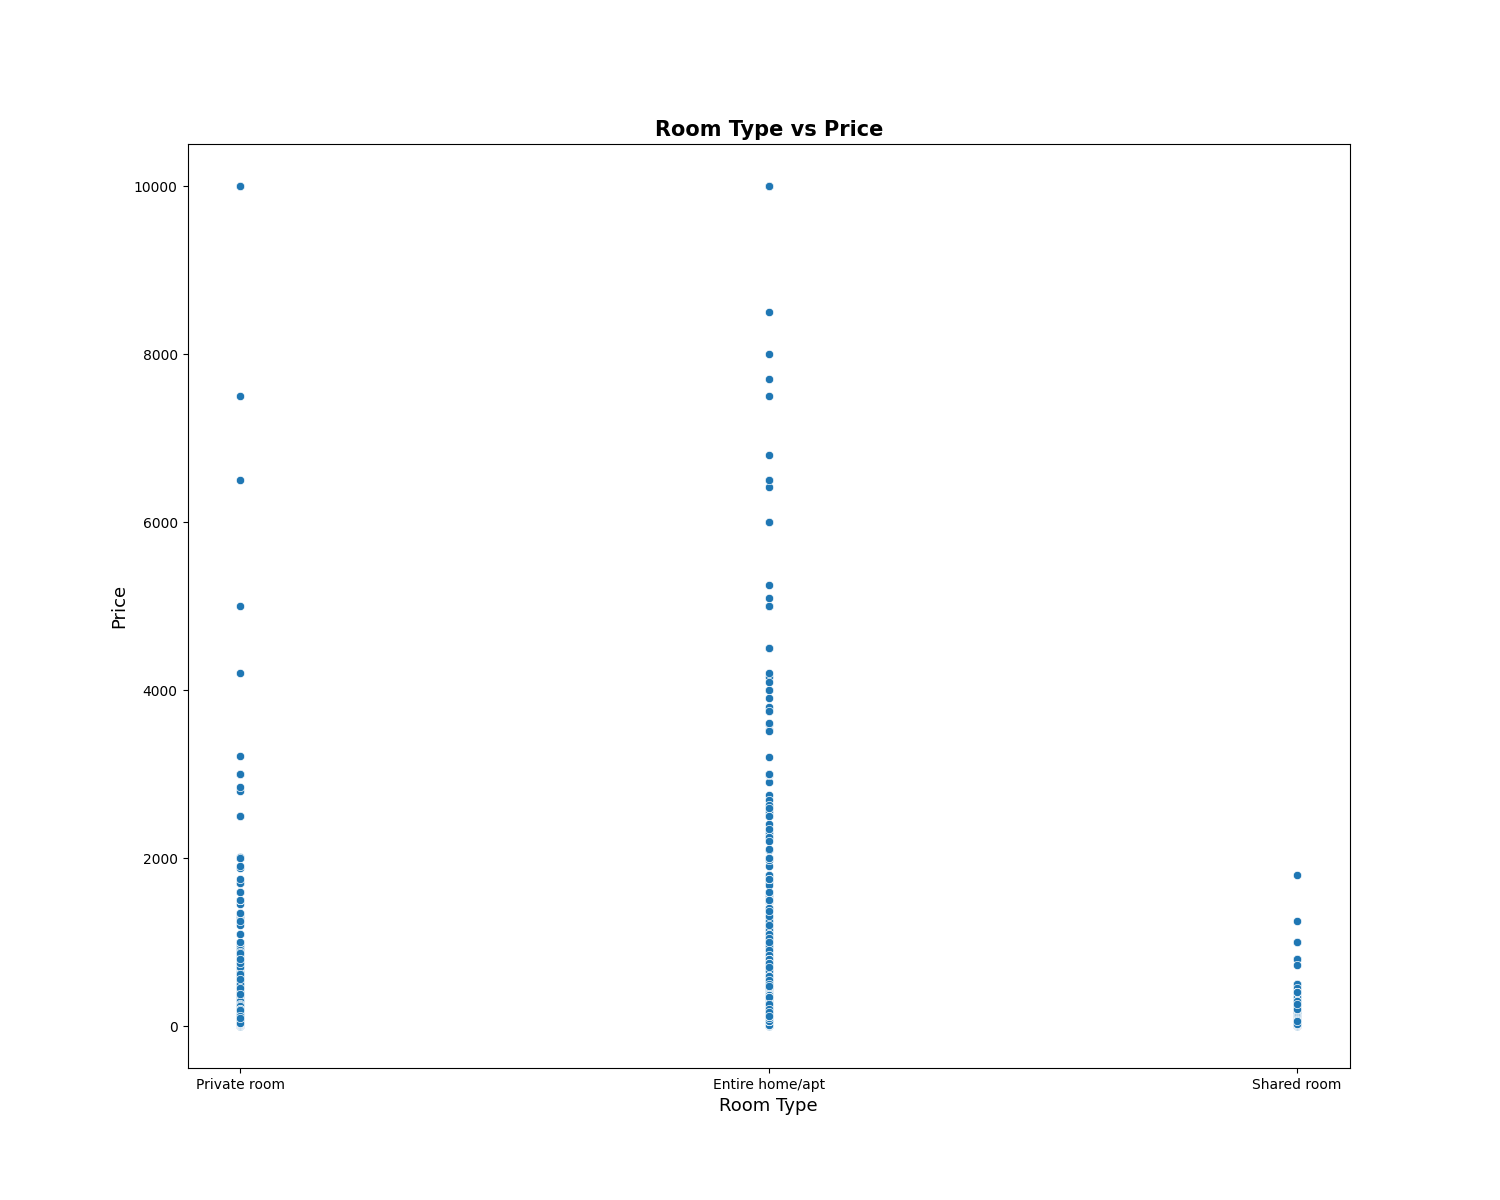

Text(0.5, 1.0, 'Room Type vs Price')

In [119]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=dataset)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

<IPython.core.display.Javascript object>


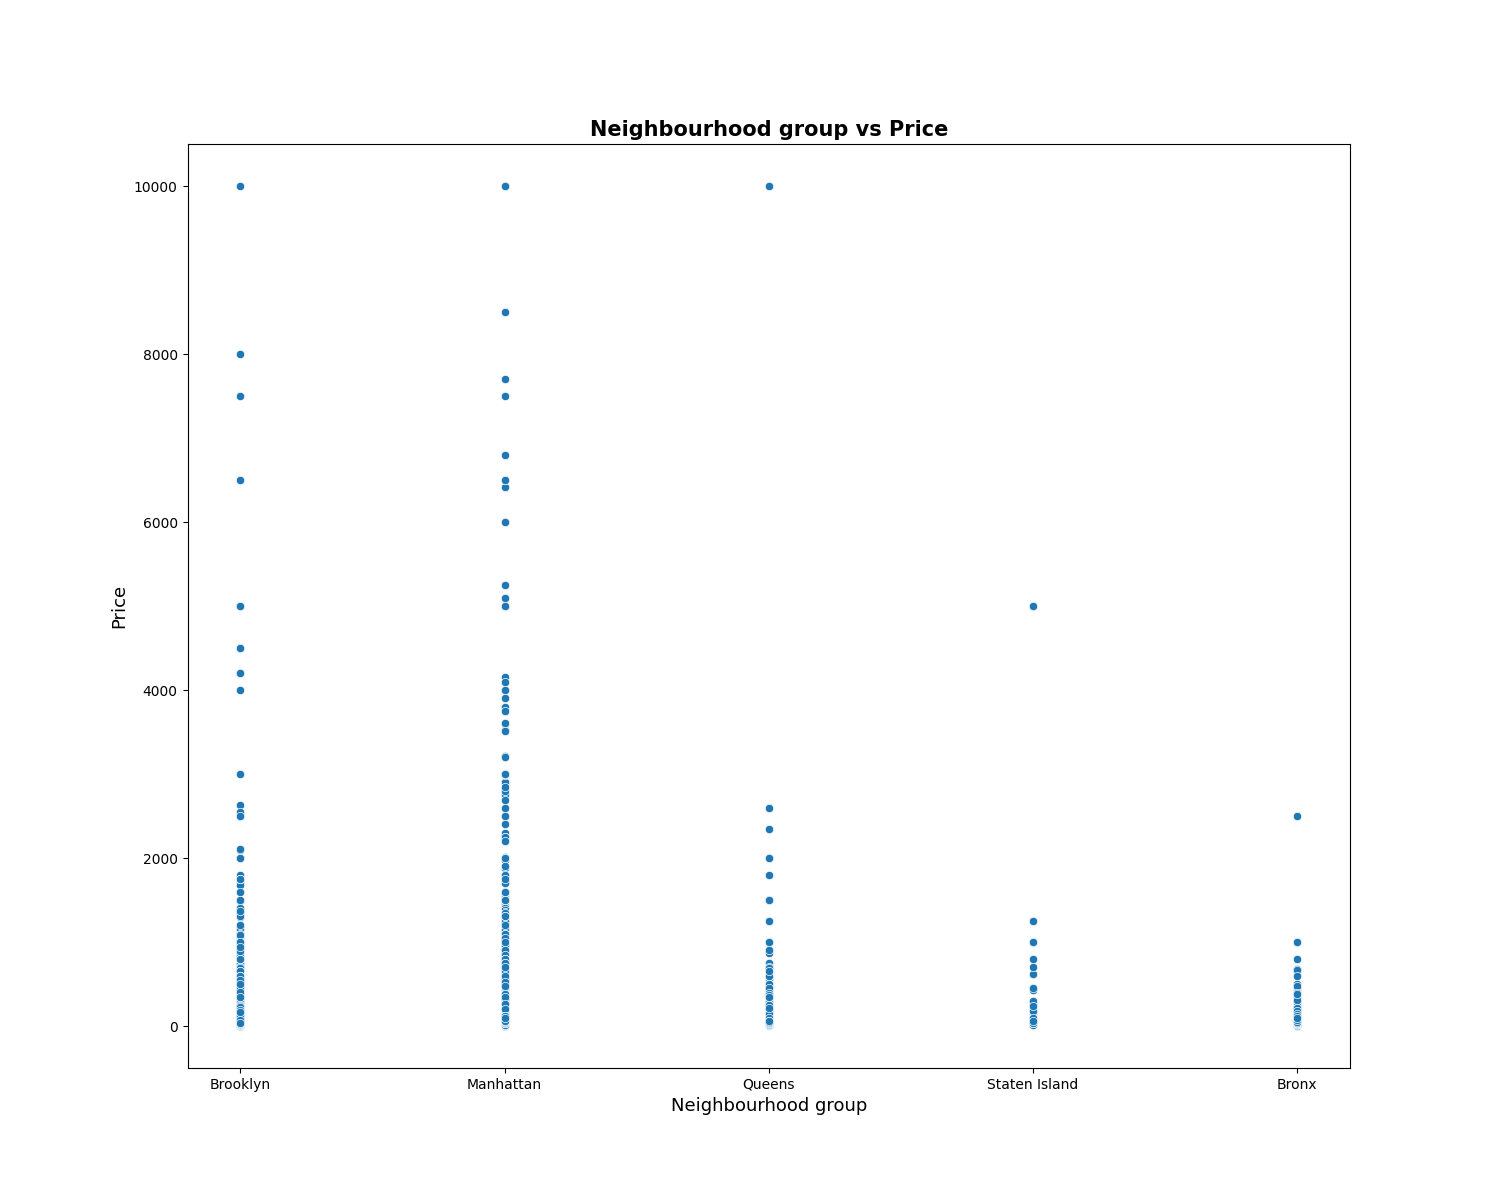

Text(0.5, 1.0, 'Neighbourhood group vs Price')

In [66]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='neighbourhood_group', y='price', data=dataset)

plt.xlabel("Neighbourhood group", size=13)
plt.ylabel("Price", size=13)
plt.title("Neighbourhood group vs Price",size=15, weight='bold')

<IPython.core.display.Javascript object>


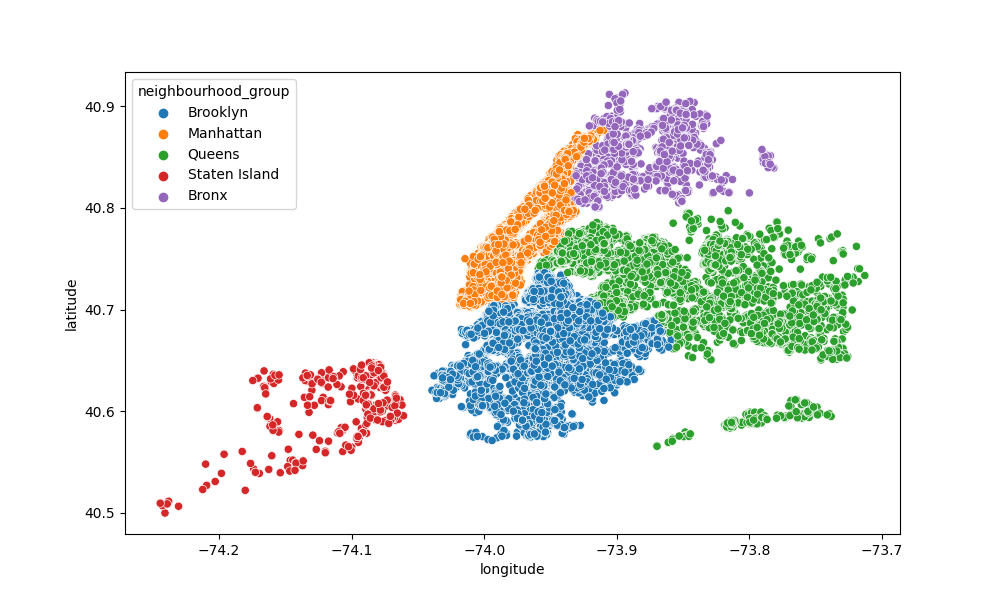

In [120]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x="longitude",y="latitude", hue="neighbourhood_group")
plt.ioff()

<IPython.core.display.Javascript object>


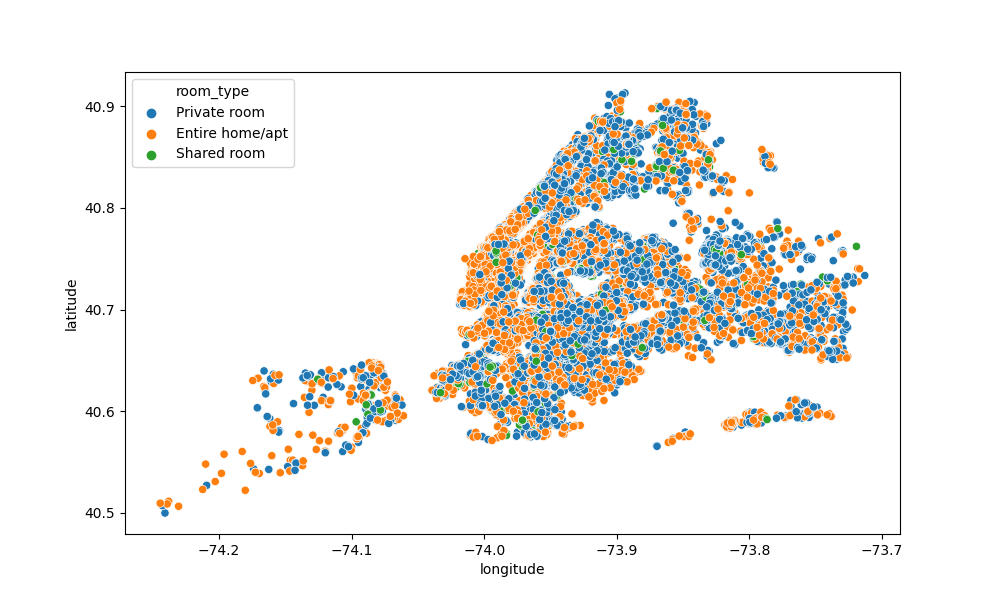

In [131]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x="longitude",y="latitude", hue="room_type")
plt.ioff()

Con estas muestra anteriores es posible apreciar no solo a nivel de comparativa los precios se ven afectados por el lugar geográfico y el tipo de habitación sino como a nivel geográfico en la topología de Nueva York podríamos ubicar estos sitios.

Habiendo finalizado el análisis de estos datos dropearemos otras columnas como host_id, name, reviews, avaliability y host listings puesto que no haremos uso de ellas en este caso.

También en vista a los dos primeros diagramas de este apartado separaremos los outliers de precio mediante un varemo dentro del mismo.

In [10]:
dataset=dataset[dataset["price"]<250]
dataset.drop(['name', 'host_id', 'latitude', 'longitude', 'neighbourhood', 'minimum_nights'], axis=1, inplace=True)

<IPython.core.display.Javascript object>


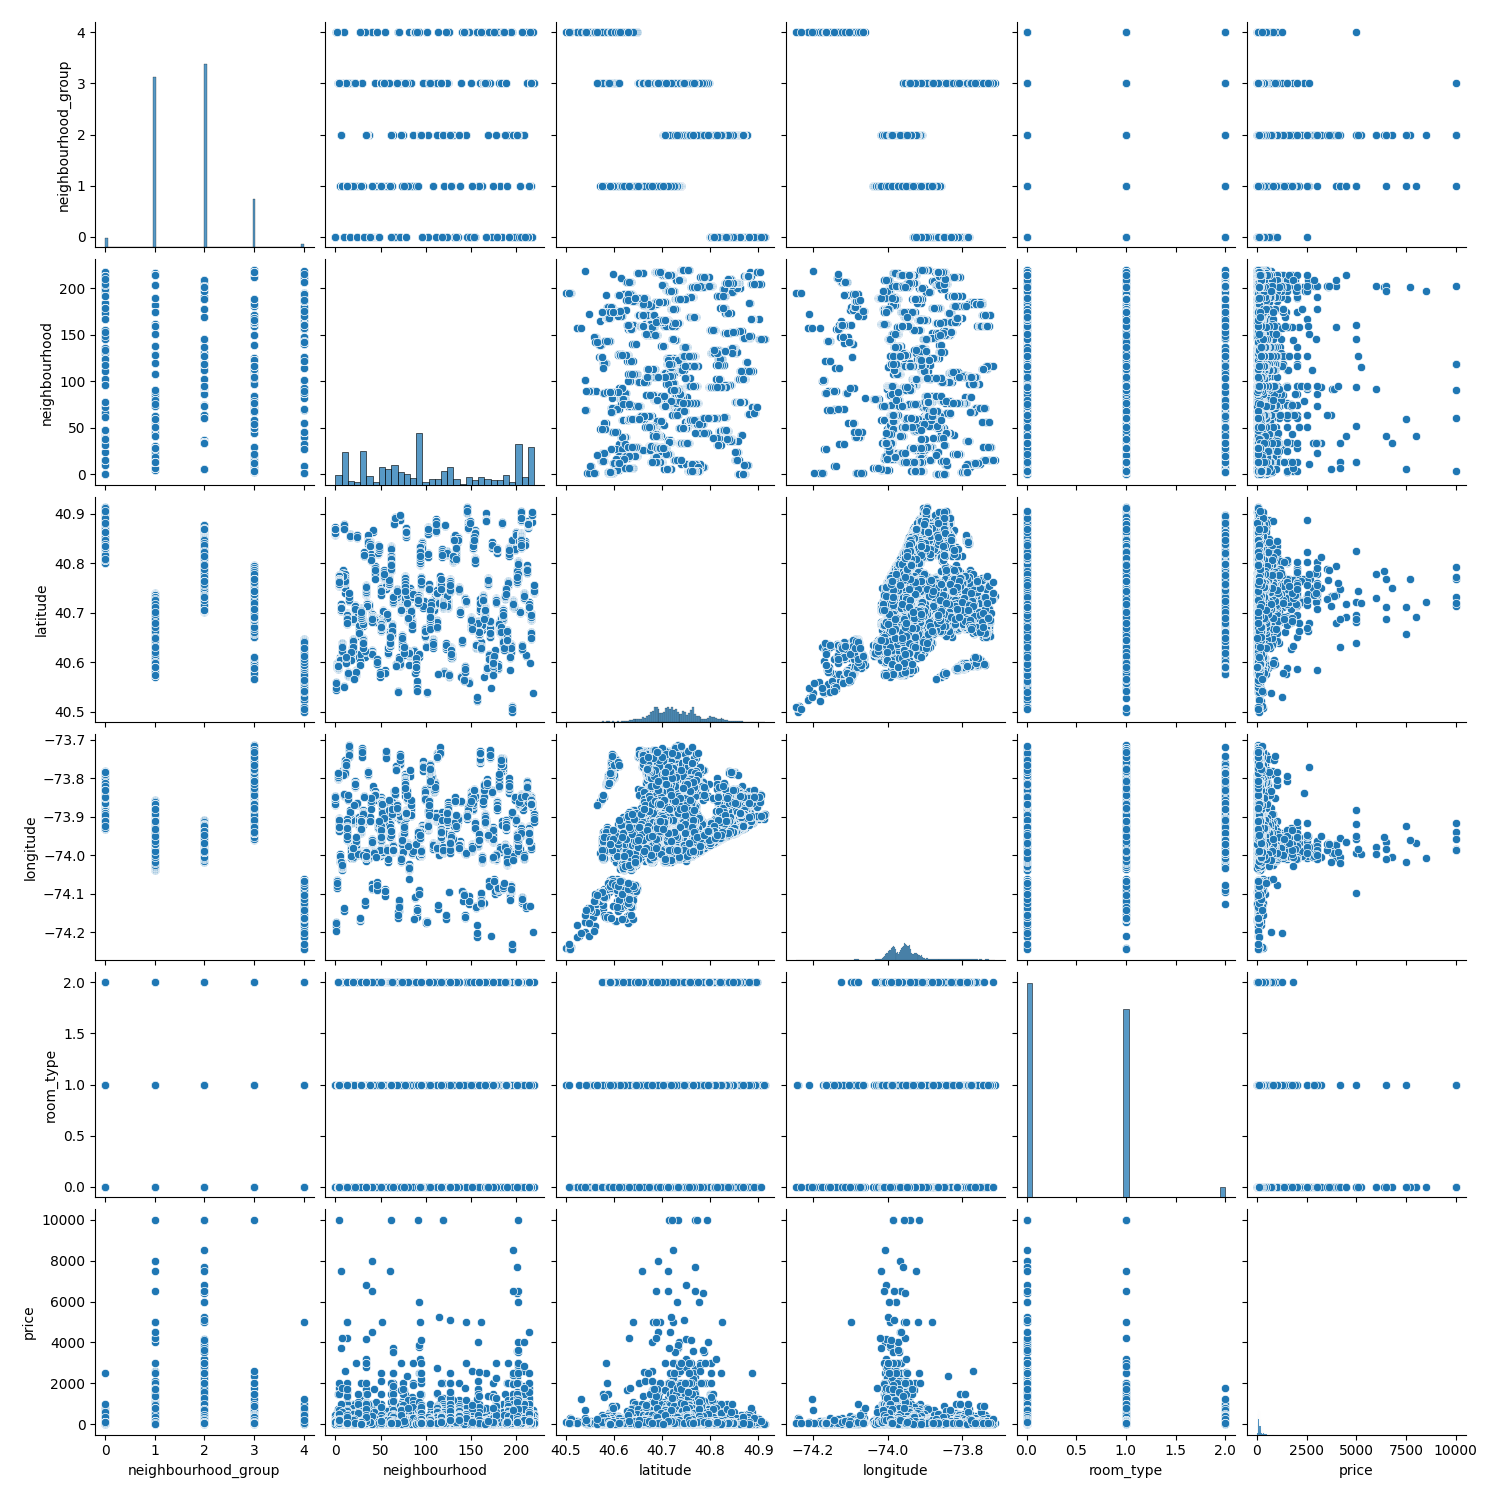

In [124]:
relacio = sns.pairplot(dataset)

<IPython.core.display.Javascript object>


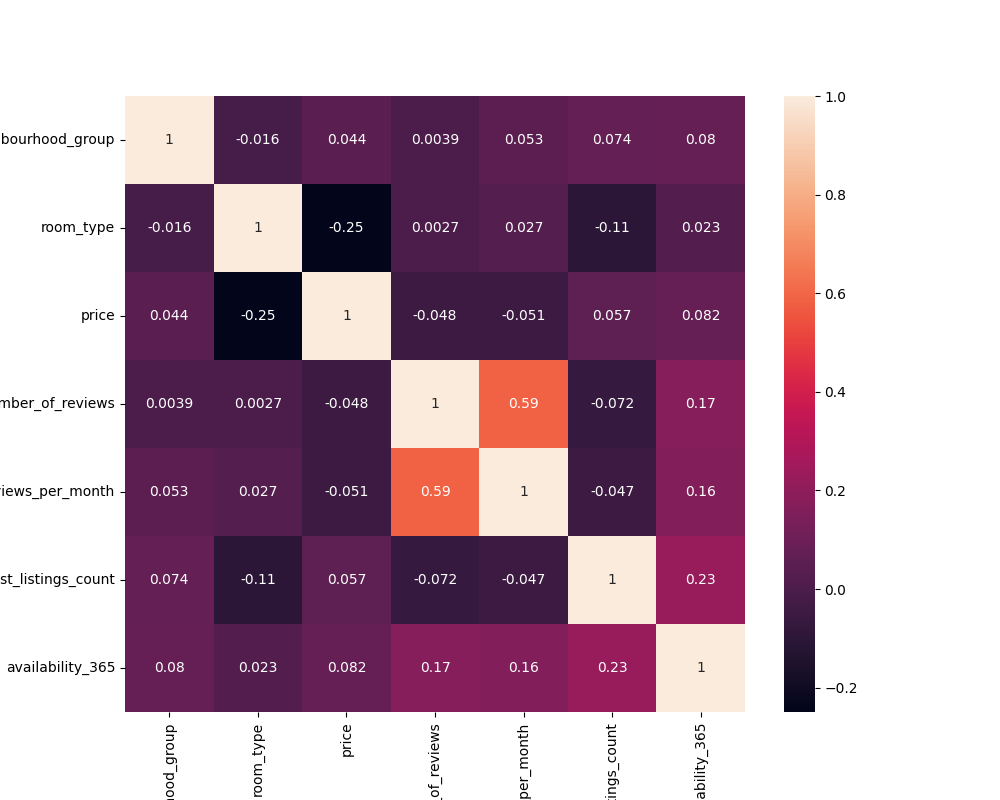

<AxesSubplot: >

In [360]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

## Comparativa de modelos, análisis de hiperparametros y crossvalidation

In [11]:
dataset.head(5)

,neighbourhood_group,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,149,9,0.21,6,365
1,2,0,225,45,0.38,2,355
2,2,1,150,0,0.00,1,365
3,1,0,89,270,4.64,1,194
4,2,0,80,9,0.10,1,0


In [12]:
dataset = pd.get_dummies(dataset, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
x = dataset.loc[:, dataset.columns != 'price'] #Columnas latitude, longitude, neighbourhood_group, room_type
y = dataset["price"] #Columna price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred1=reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print('R2: %f'% r2_score(y_test,y_pred1))
print('MAE: %f'% mean_absolute_error(y_test, y_pred1))
print('RMSE: %f'% rmse)

R2: 0.485691
MAE: 29.723851
RMSE: 38.410790


In [14]:
regRF = RandomForestRegressor(n_estimators=300)
regRF.fit(x_train, y_train)
y_pred2=regRF.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print('R2: %f'% r2_score(y_test,y_pred2))
print('MAE: %f'% mean_absolute_error(y_test, y_pred2))
print('RMSE: %f'% rmse)

R2: 0.464046
MAE: 29.804356
RMSE: 39.210704


In [17]:
regRF1 = RandomForestRegressor(n_estimators=200, max_depth = 20, min_samples_split = 5,min_samples_leaf =4)
regRF1.fit(x_train, y_train)
y_pred3=regRF1.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
print('R2: %f'% r2_score(y_test,y_pred3))
print('MAE: %f'% mean_absolute_error(y_test, y_pred3))
print('RMSE: %f'% rmse)

R2: 0.505198
MAE: 28.754812
RMSE: 37.675297


In [18]:
regL = Lasso(alpha=0.001)
regL.fit(x_train, y_train)
y_pred4=regL.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred4))
print('R2: %f'% r2_score(y_test,y_pred4))
print('MAE: %f'% mean_absolute_error(y_test, y_pred4))
print('RMSE: %f'% rmse)

R2: 0.485690
MAE: 29.724084
RMSE: 38.410799


In [19]:
regL = Lasso(alpha=0.0001)
regL.fit(x_train, y_train)
y_pred5=regL.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred5))
print('R2: %f'% r2_score(y_test,y_pred5))
print('MAE: %f'% mean_absolute_error(y_test, y_pred5))
print('RMSE: %f'% rmse)

R2: 0.485691
MAE: 29.723873
RMSE: 38.410791


In [20]:
regR = Ridge(alpha = 0.001)
regR.fit(x_train, y_train)
y_pred6=regR.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred6))
print('R2: %f'% r2_score(y_test,y_pred6))
print('MAE: %f'% mean_absolute_error(y_test, y_pred6))
print('RMSE: %f'% rmse)

R2: 0.485691
MAE: 29.723852
RMSE: 38.410790


In [21]:
regTR=DecisionTreeRegressor(min_samples_leaf=.0001)
regTR.fit(x_train,y_train)
y_pred7=regTR.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred7))
print('R2: %f'% r2_score(y_test,y_pred7))
print('MAE: %f'% mean_absolute_error(y_test, y_pred7))
print('RMSE: %f'% rmse)

R2: 0.320126
MAE: 33.376229
RMSE: 44.162663


In [592]:
GSr=RandomForestRegressor()
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth' : [10, 20, 30],
    'min_samples_split' : [2,3,4,5]
}

GSr = GridSearchCV(estimator=regRF, param_grid=param_grid, cv= 5)
GSr.fit(x_train, y_train)
best_parameters = GSr.best_params_  
best_score = GSr.best_score_ 
print(best_parameters)
print(best_score)

{'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 200}
0.5184604447030224


In [22]:
regRF3 = RandomForestRegressor(n_estimators=200, max_depth = 10, min_samples_split = 4)
regRF3.fit(x_train, y_train)
y_pred8=regRF3.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred8))
print('R2: %f'% r2_score(y_test,y_pred8))
print('MAE: %f'% mean_absolute_error(y_test, y_pred8))
print('RMSE: %f'% rmse)

R2: 0.516995
MAE: 28.499751
RMSE: 37.223466


<IPython.core.display.Javascript object>


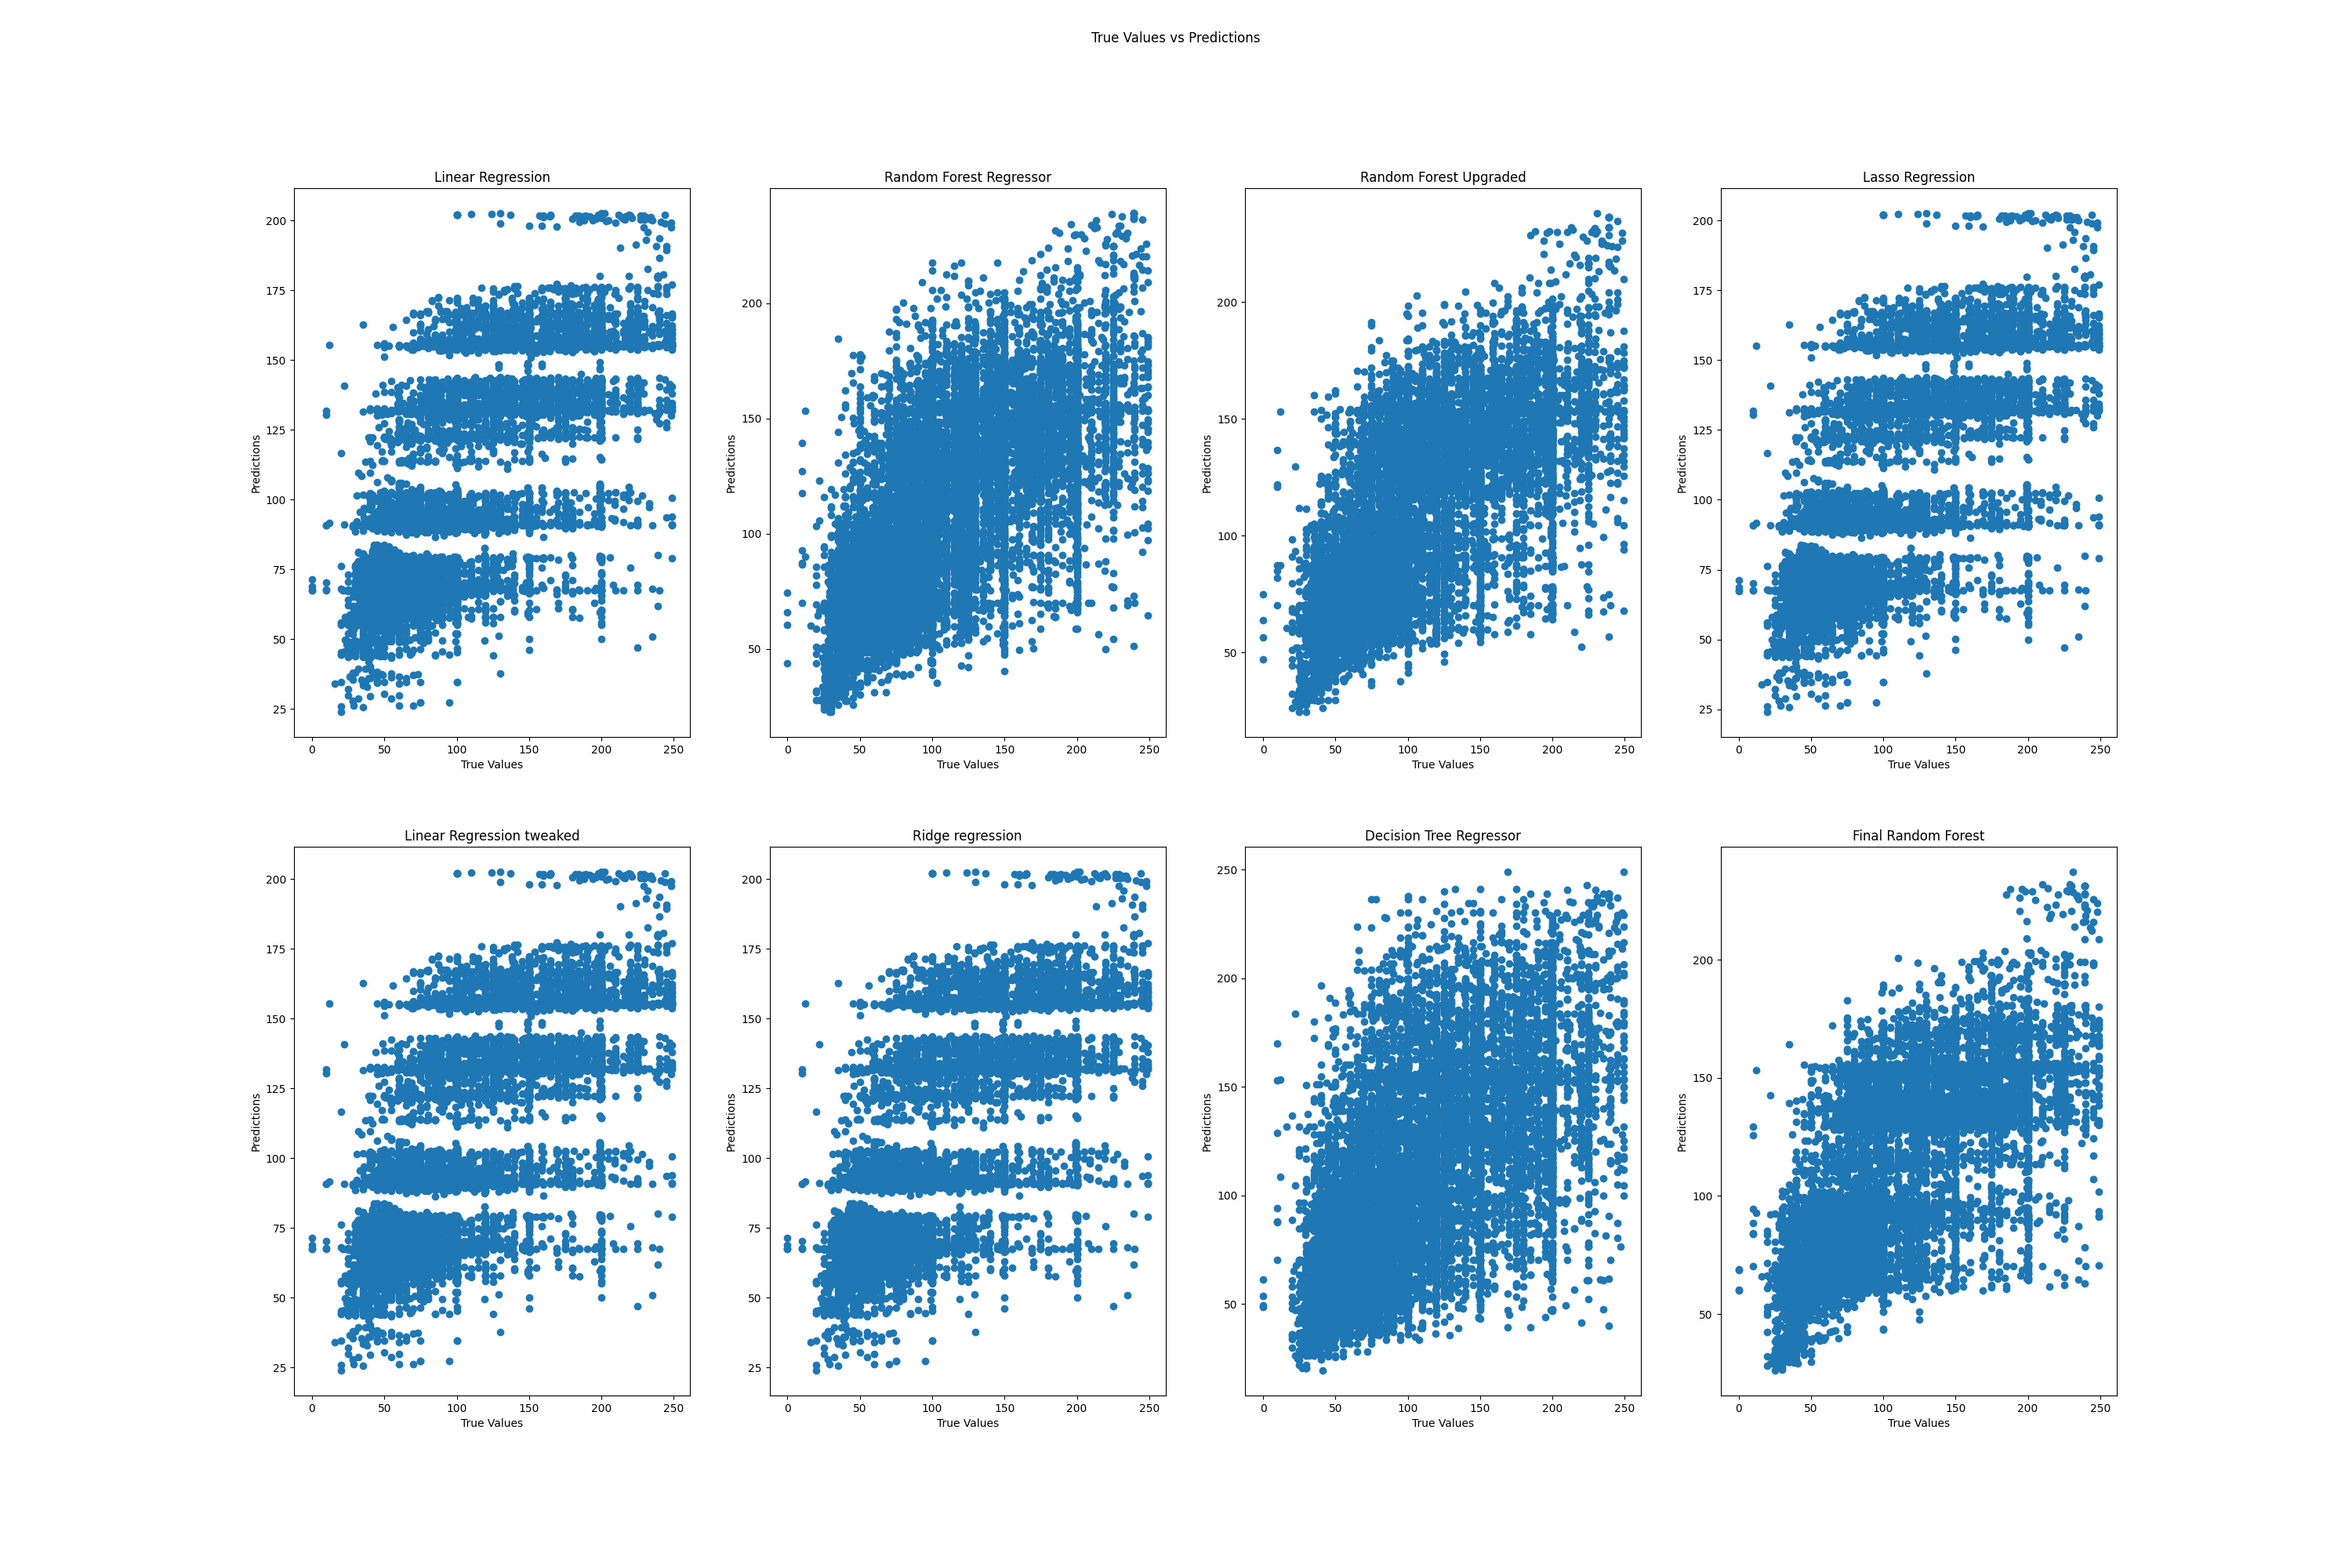

In [23]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(30, 20))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, y_pred1)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, y_pred2)
ax2.set_title('Random Forest Regressor')

ax3.scatter(y_test, y_pred3)
ax3.set_title('Random Forest Upgraded')

ax4.scatter(y_test, y_pred4)
ax4.set_title('Lasso Regression')

ax5.scatter(y_test, y_pred5)
ax5.set_title('Linear Regression tweaked')

ax6.scatter(y_test, y_pred6)
ax6.set_title('Ridge regression')

ax7.scatter(y_test, y_pred7)
ax7.set_title('Decision Tree Regressor')

ax8.scatter(y_test, y_pred8)
ax8.set_title('Final Random Forest')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')